In [1]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt
from dynamics_pendulum2 import pendulum
import pygame as pg
from scipy.optimize import minimize 
from pygame import gfxdraw
import cma

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Your code here
state_num=2
#action_num=100
order=3
d=(order+1)**state_num
#d_a=d*action_num
f_min=-10
f_max=10

def scale(state_):
    a_ = np.array([(state_[0]+20*np.pi)/(40*np.pi) ,(state_[1]+np.pi)/(2*np.pi) ])
    return a_

def create_c(k_,n_):#number of states, order
    c_ = [[] for j in range(k_)]
    for i in range(k_):
        for j in range(int(np.power(n_ + 1,i))):
            for p in range(n_ + 1):
                for r in range(int(np.power(n_ + 1,k_- i - 1))):
                    c_[i].append(p)
    c_ = np.array(c_,dtype = np.int8)
    return c_
c=create_c(state_num,order)

def create_x_i(s_): #for v_hat
    state = scale(s_)
    x_i_=np.cos(np.pi*(np.matmul(state,c)))
    return x_i_


def policy(st,theta_mu,theta_sigma):
    mu=np.matmul(theta_mu,create_x_i(st))
    sigma=np.exp(np.matmul(theta_sigma,create_x_i(st)))
    action=np.random.normal(mu,sigma,1)
    action=np.clip(action,f_min,f_max)
    return action


In [3]:
def reward(angle):
    return np.exp((angle-(np.pi))**2)
global step_per_e
step_per_e=[]
def saving(cost_in):
    global step_per_e
    step_per_e=np.append(step_per_e,[cost_in])
def new(theta):
    theta_mu = theta[0:d]
    theta_sigma=theta[d:]
    episode = 0
    step = np.empty(0)
    #state_list = []
    #step_per_episode = []
    #reward_sum = []
    pend = pendulum()
    t = 0
    action = np.empty(0)
    s = np.zeros((1,2))# states
    s[0] = [0,0]# 
    b=1
    total_cost=0
    counter=0
    while True :
        theta=np.append(theta_mu,theta_sigma)
        real_action=policy(s[t],theta_mu,theta_sigma)
        next_a_v, angle = pend.move(s[t][0], s[t][1], real_action)
        s = np.append(s,[[next_a_v,angle]],axis=0)
        #print(next_a_v,angle)
        cost_=reward(angle)
        total_cost+=cost_
        t += 1   
        if t>200:
            saving(t-1)
            break
        #if (35/36)*np.pi<angle<(37/36)*np.pi:
        #    counter+=1
        #else:
            counter=0
        #if counter==5:
         #   saving(t-1)
        #    break
        #if t%1000==0:
            #print(t, end=" ")
    #step_per_episode.append(t)
    #state_list.append(s)
    #reward_sum.append(-t)
    #return state_list,step_per_episode , reward_sum
    #print(total_cost)
    return total_cost ,s#, state_list


In [4]:
iteration_num=100
run_number=1
def eval():
    sigma0=0.25
    costs=np.empty((1,iteration_num))
    t=0
    global step_per_e
    step_per_e=[]
    for i in range(run_number):
        theta=2*d*[0]
        es = cma.CMAEvolutionStrategy(theta, sigma0).optimize(new,iterations=iteration_num)
        res=es.result
        theta=res[0]
        #sigma0=np.average(res[-2])
        file=open("outcmaes/fit.dat")
        results=[]
        for line in file:
            results += [line.split()]
        results.pop(0)
        res1=np.array(results,dtype=float)
        costs = np.append(costs,[res1[:,5]],axis=0)
        t+=1
    return costs , es,theta
costs_, es, theta=eval()
steps=np.reshape(step_per_e, (run_number*iteration_num, 14))
steps=np.min(steps, axis=1)
steps=np.reshape(steps, (run_number, iteration_num))
costs_list = np.delete(costs_, 0, axis=0)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 32 (seed=228146, Thu Apr 22 11:38:37 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     14 2.743324659152624e+05 1.0e+00 2.34e-01  2e-01  2e-01 0:02.0


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (1433929.9996735044, array([[ 0.00000000e+00,  0.00000000e+00],
       [-7.72983338e-02,  6.27927027e+00],
       [-1.52845860e-01,  6.26761779e+00],
       [-2.68797043e-01,  6.24627012e+00],
       [-4.06255243e-01,  6.21209411e+00],
       [-7.47026051e-01,  6.15370657e+00],
       [-9.05244830e-01,  6.07007507e+00],
       [-8.56470946e-01,  5.98093020e+00],
       [-7.69963794e-01,  5.89865780e+00],
       [-5.94902340e-01,  5.82964368e+00],
       [-1.88796115e-01,  5.79003575e+00],
       [ 3.87118010e-01,  5.80007513e+00],
       [ 1.21065033e+00,  5.88088025e+00],
       [ 1.10151577e+00,  5.99784037e+00],
       [ 1.21840136e+00,  6.11524617e+00],
       [ 7.66113613e-01,  6.21568797e+00],
       [ 4.72870597e-01,  6.27840097e+00],
       [ 4.23611073e-01,  4.05967865e-02],
       [ 7.75595212e-02,

    2     28 2.202002699204978e+05 1.1e+00 2.26e-01  2e-01  2e-01 0:04.0


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (626225.270626519, array([[ 0.        ,  0.        ],
       [ 0.49394365,  0.02501742],
       [-0.73696185,  0.01268386],
       [-0.50548516,  6.23297898],
       [-0.98466567,  6.15753458],
       [ 0.1438792 ,  6.11500641],
       [ 0.58026674,  6.1516706 ],
       [ 0.67139191,  6.21503151],
       [ 0.82373771,  0.00753733],
       [ 0.50172997,  0.07462734],
       [ 0.26528282,  0.11344755],
       [-0.63995018,  0.09445916],
       [-0.56836098,  0.03329433],
       [ 0.23534216,  0.01645644],
       [-0.39767089,  0.00822279],
       [ 0.81408624,  0.02933376],
       [-0.1162808 ,  0.06463444],
       [-0.9416026 ,  0.01106093],
       [-0.07040341,  6.24303785],
       [ 0.01982535,  6.24047977],
       [ 0.50045119,  6.26682972],
       [ 0.58205328,  0.03844596],
       [-0.5007691 ,  0.042533

    3     42 2.159782574284768e+05 1.1e+00 2.21e-01  2e-01  2e-01 0:05.9
    5     70 2.124259351839091e+05 1.1e+00 2.16e-01  2e-01  2e-01 0:09.9
    7     98 1.805407707659698e+05 1.2e+00 2.11e-01  2e-01  2e-01 0:13.9
   10    140 1.756560351614918e+05 1.2e+00 2.11e-01  2e-01  2e-01 0:20.1
   13    182 1.731124657657234e+05 1.3e+00 2.14e-01  2e-01  2e-01 0:26.5
   17    238 1.464259497173922e+05 1.4e+00 2.19e-01  2e-01  2e-01 0:35.3
   21    294 1.559179928553394e+05 1.4e+00 2.11e-01  2e-01  2e-01 0:43.9
   26    364 1.327671267799784e+05 1.5e+00 2.02e-01  2e-01  2e-01 0:54.5
   31    434 1.929416852463429e+05 1.5e+00 1.95e-01  2e-01  2e-01 1:05.1
   37    518 1.633185384972640e+05 1.6e+00 2.03e-01  2e-01  2e-01 1:18.2
   43    602 1.611277090351399e+05 1.7e+00 2.17e-01  2e-01  2e-01 1:31.5
   49    686 1.582640960016398e+05 1.7e+00 2.15e-01  2e-01  2e-01 1:45.0
   56    784 1.480879324721663e+05 1.8e+00 1.99e-01  2e-01  2e-01 2:01.3
   63    882 1.233623015859046e+05 1.8e+00 2.00e-01

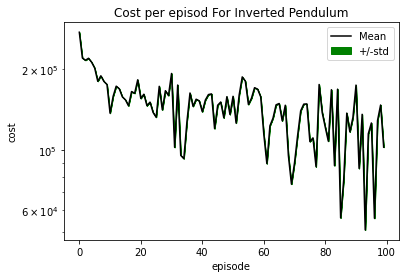

In [5]:
cost_std=np.std(costs_list, axis=0)
cost_ave=np.average(costs_list, axis=0)
x = np.arange(iteration_num)
plt.plot(x,cost_ave,color="black",label='Mean')
plt.fill_between(x,cost_ave+cost_std,cost_ave-cost_std,color="g",label='+/-std')
plt.xlabel("episode")
plt.ylabel("cost")
plt.yscale("log")
plt.title("Cost per episod For Inverted Pendulum")
plt.legend()

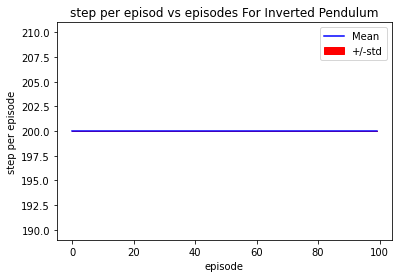

In [6]:
steps_std=np.std(steps, axis=0)
steps_ave=np.mean(steps, axis=0)
#steps_med=np.median(steps, axis=0)
x_ = np.arange(iteration_num)
plt.plot(x_,steps_ave,color="blue",label='Mean')
plt.fill_between(x_,steps_ave+steps_std,steps_ave-steps_std,color="red",label='+/-std')
plt.xlabel("episode")
plt.ylabel("step per episode")
#plt.yscale("log")
plt.title("step per episod vs episodes For Inverted Pendulum")
plt.legend()

In [6]:
_ , s = new(theta)

Text(0.5, 0, 'steps')

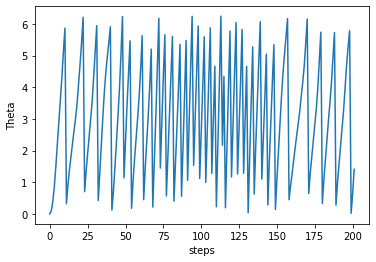

In [7]:

states=np.array(s)
#print(s)
#plt.plot(states[:,0])
plt.plot(states[:,1])
plt.ylabel("Theta")
plt.xlabel("steps")

Text(0.5, 0, 'steps')

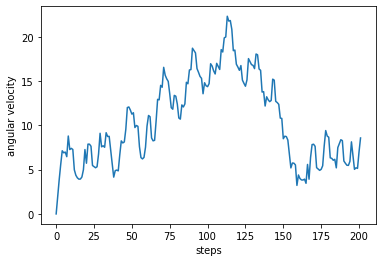

In [8]:
plt.plot(states[:,0])
plt.ylabel("angular velocity")
plt.xlabel("steps")

In [68]:
print(costs_)

[77554.65664678752]
